# NLP Basic Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [1]:
# 필요한 모듈 불러오기
import pandas as pd

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/투빅스 연합동아리/Git/Week7/nlp_basic

/content/drive/MyDrive/투빅스 연합동아리/Git/Week7/nlp_basic


In [9]:
spam = pd.read_csv('./spam.csv')

In [46]:
spam.iloc[6]['v2']

'Even my brother is not like to speak with me. They treat me like aids patent.'

In [32]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Tokenizing


In [25]:
import nltk

In [40]:
from nltk.tokenize import word_tokenize

# 문장 분절 but 필요한 전처리 과정은 아님
spam_c = spam.copy()
spam_c['v2'] = spam['v2'].apply(nltk.sent_tokenize)
spam_c

,v1,v2
0,ham,"[Go until jurong point, crazy.., Available onl..."
1,ham,"[Ok lar..., Joking wif u oni...]"
2,spam,[Free entry in 2 a wkly comp to win FA Cup fin...
3,ham,[U dun say so early hor... U c already then sa...
4,ham,"[Nah I don't think he goes to usf, he lives ar..."
...,...,...
5567,spam,[This is the 2nd time we have tried 2 contact ...
5568,ham,[Will Ì_ b going to esplanade fr home?]
5569,ham,"[Pity, * was in mood for that., So...any other..."
5570,ham,[The guy did some bitching but I acted like i'...


In [57]:
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

spam_c = spam.copy()

def clean_text(text):
    # 특수기호 삭제 후 토큰화
    text = re.sub(r'<.*?>|[^\w\s]', '', text)
    # 토큰화
    tokens = word_tokenize(text)

    # 불용어 제거
    stop_words = set(stopwords.words('english'))
    
    words = []
    for w in tokens:
        if w not in stop_words:
            words.append(w)
    return ' '.join(words)

spam_c['v2'] = spam_c['v2'].apply(clean_text)
spam_c

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,v1,v2
0,ham,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor U c already say
4,ham,Nah I dont think goes usf lives around though
...,...,...
5567,spam,This 2nd time tried 2 contact u U å750 Pound p...
5568,ham,Will Ì_ b going esplanade fr home
5569,ham,Pity mood Soany suggestions
5570,ham,The guy bitching I acted like id interested bu...


## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

### One-hot encoding

In [111]:
from tensorflow.keras.preprocessing.text import Tokenizer
spam_c = spam.copy()
texts = spam_c['v2'].tolist()
labels = spam_c['v1'].tolist()

# 토큰화
tokenizer = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[]^_`{|}~', lower=True, split=' ')
tokenizer.fit_on_texts(texts)

# text to sequence
sequences = tokenizer.texts_to_sequences(texts)
print(sequences)

# 각 문자에 해당하는 index값 출력력
word_index = tokenizer.word_index
print(word_index)

[[50, 470, 4447, 840, 795, 655, 64, 8, 1320, 89, 120, 349, 1321, 147, 2999, 1322, 67, 58, 4448, 144], [46, 335, 1494, 471, 6, 1932], [47, 487, 8, 19, 4, 796, 898, 2, 178, 1933, 1197, 656, 1934, 2322, 266, 2323, 71, 1933, 2, 1935, 2, 336, 487, 554, 953, 73, 387, 179, 657, 388, 3000], [6, 246, 152, 23, 379, 3001, 6, 140, 154, 57, 152], [1017, 1, 99, 106, 69, 488, 2, 1018, 69, 1936, 219, 111, 472], [797, 135, 67, 1685, 145, 108, 160, 1937, 21, 7, 38, 337, 87, 899, 55, 115, 411, 3, 44, 12, 14, 84, 1938, 46, 429, 953, 4449, 2, 68, 322, 234, 2, 3002], [212, 11, 631, 9, 25, 55, 2, 389, 35, 10, 109, 717, 10, 55, 4450, 4451], [72, 235, 13, 1198, 2324, 2325, 1939, 2326, 2327, 2328, 798, 119, 108, 607, 72, 13, 1019, 12, 51, 1686, 841, 412, 2, 1098, 13, 247, 1019], [718, 72, 4, 842, 439, 236, 3, 17, 108, 440, 2, 3003, 1323, 150, 954, 2, 123, 16, 3004, 123, 413, 3005, 517, 955, 579, 64], [136, 13, 96, 682, 1020, 26, 133, 6, 81, 1199, 2, 489, 2, 5, 323, 533, 900, 35, 338, 12, 47, 16, 5, 96, 489, 243

### CBOW

In [133]:
from gensim.models import Word2Vec

spam_c = spam.copy()
texts = [text.split() for text in spam_c['v2'].tolist()]

# CBOW model 학습
model = Word2Vec(texts, size=100, window=5, min_count=1, workers=4)

# jurong 과 유사한 단어들
model.wv.most_similar("jurong")

[('ppl', 0.9540024399757385),
 ('0845', 0.9533889889717102),
 ('payoh', 0.9525255560874939),
 ('charges', 0.951930046081543),
 ('birla', 0.9518404006958008),
 ('de.', 0.9517450928688049),
 ('ass', 0.9517356157302856),
 ('@', 0.9515267610549927),
 ("dsn't", 0.951348066329956),
 ('messages', 0.9512646198272705)]

### skip-gram

In [134]:
from gensim.models import Word2Vec

spam_c = spam.copy()
texts = [text.split() for text in spam_c['v2'].tolist()]

# CBOW model 학습
model = Word2Vec(texts, size=100, window=5, min_count=1, workers=4, sg=1) # sg=1 : skip-gram 사용

# word vectors
word_vectors = model.wv

# jurong 과 유사한 단어들
model.wv.most_similar("jurong")

[('Phone', 0.9920520782470703),
 ('Tone', 0.9919778108596802),
 ('Shampain', 0.9919614195823669),
 ('å£1.50', 0.9919271469116211),
 ("dsn't", 0.9919185638427734),
 ('With', 0.9918556809425354),
 ('TIME', 0.991806149482727),
 ('ALL', 0.9918050765991211),
 ('rentl.', 0.9918041825294495),
 ('IBH', 0.9918032884597778)]

### GloVe

In [129]:
from glove import Corpus, Glove

spam_c = spam.copy()
texts = [text.split() for text in spam_c['v2'].tolist()]

corpus = Corpus()
corpus.fit(texts, window=5)

# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.
glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

print(glove.most_similar("jurong"))

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
[('fo', 0.6773107632404779), ('lifetime', 0.6763852475411984), ('hey.', 0.6497218784712872), ('Expecting', 0.6491452657333129)]


### FastText

In [135]:
from gensim.models import FastText

spam_c = spam.copy()
texts = [text.split() for text in spam_c['v2'].tolist()]

# CBOW model 학습
model = FastText(texts, size=100, window=5, min_count=5, workers=4, sg=1)

# word vectors
word_vectors = model.wv

# jurong 과 유사한 단어들
model.wv.most_similar("jurong")

[('busy', 0.9982510805130005),
 ('mayb', 0.9982357621192932),
 ('fun', 0.9981403350830078),
 ('looked', 0.9979585409164429),
 ('finished', 0.9978636503219604),
 ("i'd", 0.9970904588699341),
 ('sun', 0.9966018795967102),
 ('yet.', 0.9964455366134644),
 ('she.s', 0.9964369535446167),
 ('book', 0.9963490962982178)]

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

### Module import

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Data

In [137]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [138]:
display(spam.head())

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [139]:
spam['v1']=spam['v1'].replace(['ham','spam'],[0,1])
spam

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### 데이터 살펴보기

<AxesSubplot:xlabel='v1', ylabel='count'>

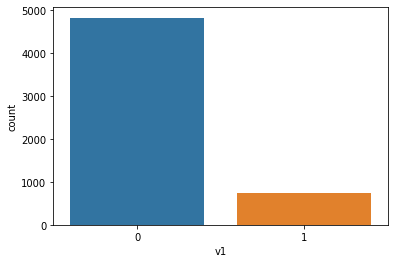

In [142]:
sns.countplot(x = spam['v1'])

메일 최대 길이 : 172


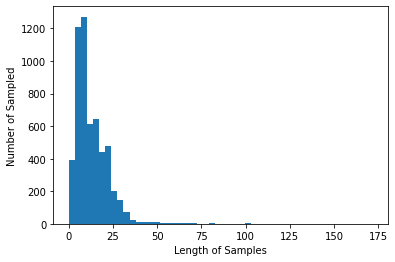

In [150]:
X = spam['v2']
Y = spam['v1']

vocab_size = 1000 # 토큰화할 단어 수

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X) # 토큰화
sequences = tokenizer.texts_to_sequences(X) # 토큰에 인덱스 추가

# X데이터를 전처리한 sequence로 다시 저장
X = sequences

print(f'메일 최대 길이 : {max(len(i) for i in X)}')

plt.hist([len(i) for i in X], bins = 50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Sampled')
plt.show()

### 길이 제한을 두자

In [164]:
max_len = 50
data = pad_sequences(X, maxlen = max_len)  # 모든 원소의 길이를 동일하게 맞추어 준다.
print(data.shape) # (5169, 60)

train_idx = int(len(sequences) * 0.8) # 4457
test_idx = int(len(sequences) - train_idx) # 1115

# train
X_train = data[:train_idx]
y_train = np.array(Y[:train_idx])

# test
X_test = data[train_idx:]
y_test = np.array(Y[train_idx:])

(5572, 50)


### Model

In [165]:
# 모델 구성
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding,Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(Dropout(0.2))
model.add(Conv1D(32, 5, strides=1, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          32000     
                                                                 
 dropout_2 (Dropout)         (None, None, 32)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 32)          5152      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                      

In [166]:
# earlystopping, checkpoints
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode = 'max', verbose=1, save_best_only=True)

### training

In [167]:
# 모델 학습
history = model.fit(X_train, y_train, epochs = 10, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
51/56 [==========================>...] - ETA: 0s - loss: 0.4749 - acc: 0.8676
Epoch 1: val_acc improved from -inf to 0.85987, saving model to best_model.h5
56/56 [==============================] - 2s 13ms/step - loss: 0.4729 - acc: 0.8651 - val_loss: 0.4137 - val_acc: 0.8599
Epoch 2/10
56/56 [==============================] - ETA: 0s - loss: 0.3822 - acc: 0.8662
Epoch 2: val_acc did not improve from 0.85987
56/56 [==============================] - 1s 10ms/step - loss: 0.3822 - acc: 0.8662 - val_loss: 0.3543 - val_acc: 0.8599
Epoch 3/10
54/56 [===========================>..] - ETA: 0s - loss: 0.2194 - acc: 0.9129
Epoch 3: val_acc improved from 0.85987 to 0.97646, saving model to best_model.h5
56/56 [==============================] - 1s 9ms/step - loss: 0.2165 - acc: 0.9147 - val_loss: 0.0921 - val_acc: 0.9765
Epoch 4/10
52/56 [==========================>...] - ETA: 0s - loss: 0.0598 - acc: 0.9853
Epoch 4: val_acc improved from 0.97646 to 0.98318, saving model to best_model.h5

### visualize

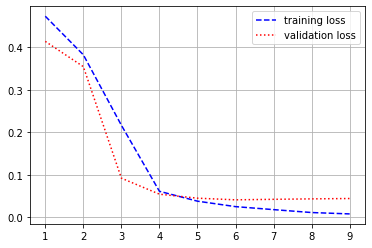

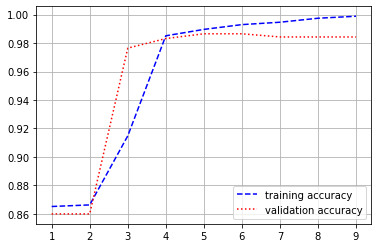

In [168]:
# 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b--', label = 'training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation accuracy')
plt.grid()
plt.legend()

plt.show()